In [2]:
from google.colab import files
upload = files.upload

/tmp/ipython-input-897002050.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


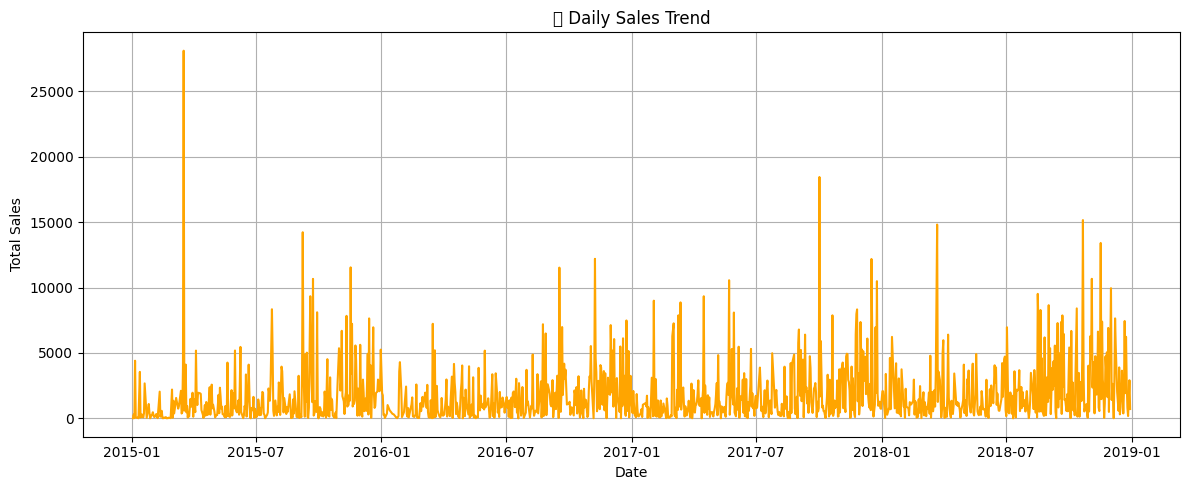

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("train.csv")

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Convert 'Order Date' to datetime (day comes first)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Step 4: Group sales by date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Step 5: Plot the sales trend
plt.figure(figsize=(12, 5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], color='orange')
plt.title("📈 Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
pip install prophet

In [12]:
from prophet import Prophet

# Prophet needs 'ds' and 'y' columns
prophet_df = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Create the Prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgluf4oal/n3ljrlog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgluf4oal/2r01ogw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90824', 'data', 'file=/tmp/tmpgluf4oal/n3ljrlog.json', 'init=/tmp/tmpgluf4oal/2r01ogw_.json', 'output', 'file=/tmp/tmpgluf4oal/prophet_model3b50imwr/prophet_model-20250804053809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:38:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:38:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


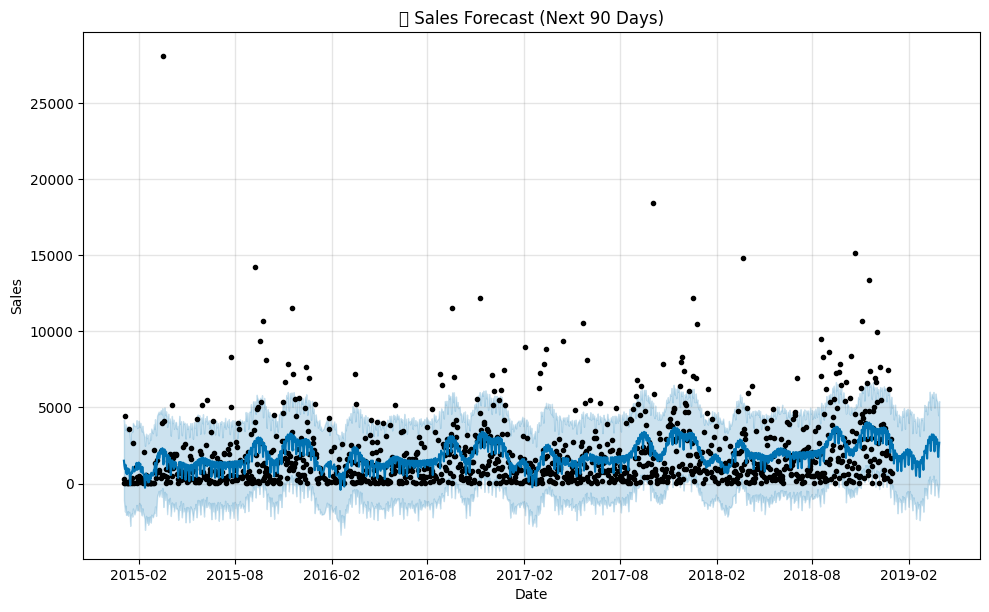

In [13]:
# Create future 90 days
future = model.make_future_dataframe(periods=90)

# Predict future sales
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("📈 Sales Forecast (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()